In [ ]:
!pip install -i https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ submodlib

Looking in indexes: https://test.pypi.org/simple/, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for submodlib: filename=submodlib-1.1.5-cp39-cp39-linux_x86_64.whl size=536046 sha256=86bf913d074f085f384230f64fbebb6d15560b5235919ebecf03a3d06b7cbd7a
  Stored in directory: /root/.cache/pip/wheels/0a/14/11/62df6592645e21707f36dfbe513f90548a43c6cd6246b54627
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=e68c2c00e437da4f785f23d37574faf673af40d83e6edadb351ccf65a4886642
  Stored in directory: /root/.cache/pip/wheels/d5/b2/a9/590d15767d34955f20a9a033e8db973b79cb5672d95790c0a9
Successfully built submodlib sklearn


In [ ]:
import submodlib

In [ ]:
import numpy as np
groundData =np.loadtxt("./gset_1.txt", delimiter=',', usecols=range(2))
groundxs = [x[0] for x in groundData]
groundys = [x[1] for x in groundData]
repData =np.loadtxt("./rep.txt", delimiter=',', usecols=range(2))
repxs = [x[0] for x in repData]
repys = [x[1] for x in repData]
# print(len(repxs))
# print(repxs)
# print(repys)

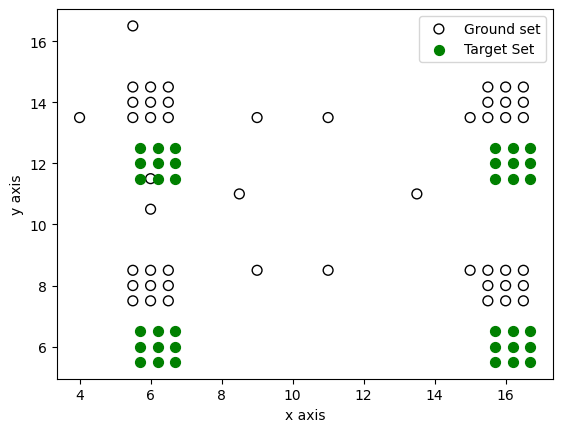

In [ ]:
import matplotlib.pyplot as plt
#plt.scatter(groundxs, groundys, s=50, color='black', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Ground")
plt.scatter(repxs, repys, s=50, color='green', label="Target")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend(["Ground set","Target Set"])
plt.show()

## Facility Location

[(47, 7.033941428409889), (35, 5.059139810502529), (32, 3.6034038364887238), (17, 3.2280133664608), (36, 0.10896065831184387), (18, 0.10896065831184387), (33, 0.10896041989326477), (15, 0.057381629943847656), (34, 0.013332635164260864), (31, 0.013332635164260864)]


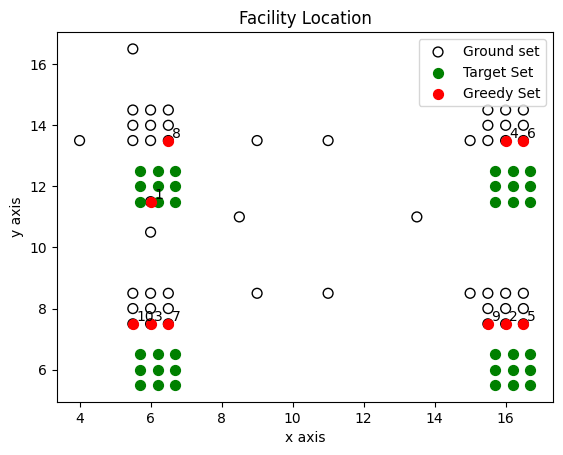

In [ ]:
from submodlib import FacilityLocationFunction
objFL = FacilityLocationFunction(n=48, data=groundData,separate_rep=True, n_rep=36, data_rep=repData,  mode="dense", metric="euclidean")
greedyList = objFL.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Ground")
plt.scatter(repxs, repys, s=50, color='green', label="Target")
plt.scatter(greedyXs, greedyYs, s=50, color='red', label="Greedy")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend(["Ground set","Target Set","Greedy Set"])
plt.title("Facility Location")
for label, element in enumerate(greedyList):
    plt.annotate(label+1, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
plt.show()

## Disparity Sum

[(47, 0.0), (36, 0.9963682889938354), (6, 1.9655494093894958), (45, 2.914377808570862), (40, 3.8598334789276123), (31, 4.7889745235443115), (39, 5.711325526237488), (0, 6.47794497013092), (38, 7.407852113246918), (42, 8.133478105068207)]


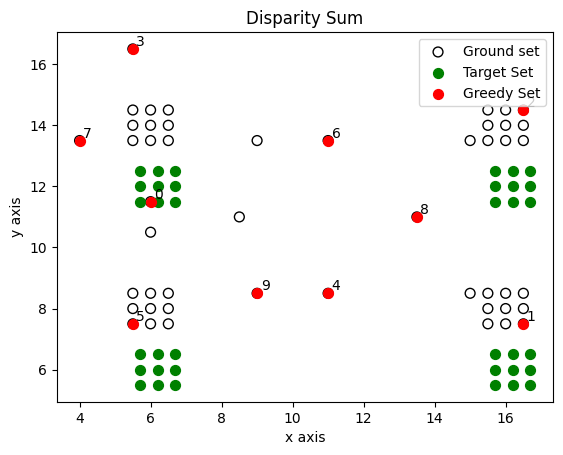

In [ ]:
from submodlib import DisparitySumFunction
objDM = DisparitySumFunction(n=48, data=groundData, mode="dense", metric="euclidean")
greedyList = objDM.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
#plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Ground")
plt.scatter(repxs, repys, s=50, color='green', label="Target")
plt.scatter(greedyXs, greedyYs, s=50, color='red', label="Greedy")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend(["Ground set","Target Set","Greedy Set"])
plt.title("Disparity Sum")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

## GraphCutFunction

[(47, 6.033941428409889), (35, 4.239338019164279), (32, 3.945875562960282), (17, 3.3656900762580335), (15, 2.618706743698567), (36, 2.5117731280624866), (33, 2.257616095012054), (46, 1.6663244452793151), (18, 1.6358305903850123), (34, 0.9449111032299697)]
[(47, 5.033941428409889), (35, 3.230169848771766), (32, 2.661729105981067), (17, 2.248039923608303), (15, 0.7821360705420375), (36, -0.16800153721123934), (33, -0.704092658823356), (38, -0.8642095131799579), (18, -1.7126501934835687), (0, -1.8986488083028235)]
[(47, 4.033941428409889), (35, 2.2210016783792526), (32, 1.3775826490018517), (17, 1.1303897709585726), (15, -1.0544346026144922), (38, -2.086661501787603), (42, -3.3050946621224284), (36, -3.582897698506713), (45, -3.932376338489121), (6, -4.785716091108043)]


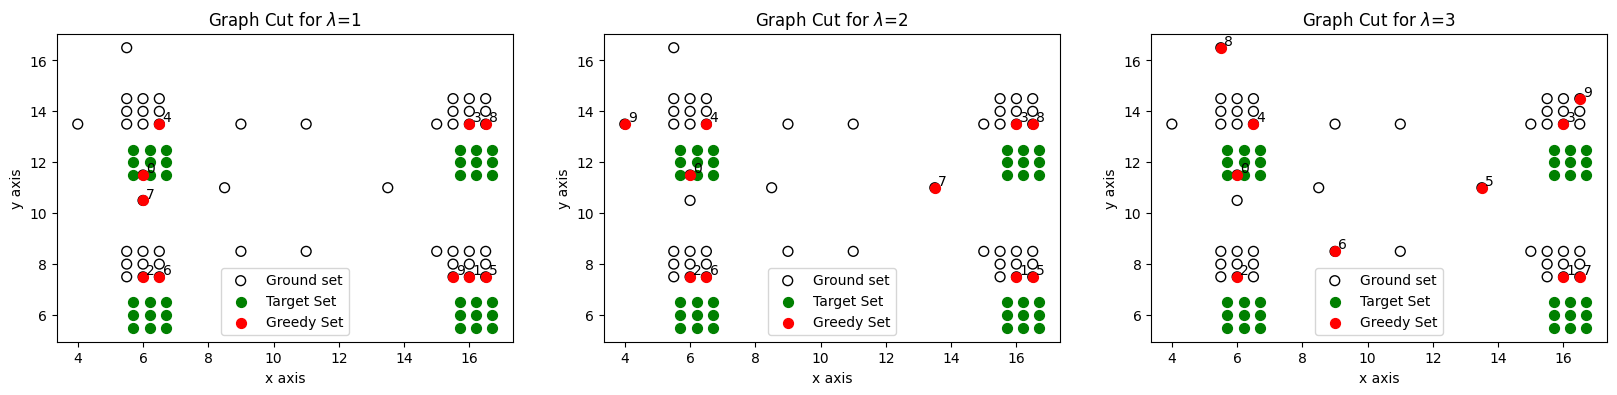

In [ ]:
from submodlib import GraphCutFunction
lambdas = [1, 2, 3]
index = 1
plt.figure(figsize = (20, 4))
for lambdaVal in lambdas:
  objGC = GraphCutFunction(n=48, mode="dense", separate_rep=True, n_rep=36, data_rep=repData, lambdaVal=lambdaVal, data=groundData, metric="euclidean")
  greedyList = objGC.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
  print(greedyList)
  greedyXs = [groundxs[x[0]] for x in greedyList]
  greedyYs = [groundys[x[0]] for x in greedyList]
  #plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
  plt.subplot(1, 3, index)
  plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Ground")
  plt.scatter(repxs, repys, s=50, color='green', label="Target")
  plt.scatter(greedyXs, greedyYs, s=50, color='red', label="Greedy")
  plt.xlabel("x axis")
  plt.ylabel("y axis")
  plt.legend(["Ground set","Target Set","Greedy Set"])
  for label, element in enumerate(greedyList):
      plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
  plt.title('Graph Cut for $\lambda$='+str(lambdaVal))
  index += 1

In [ ]:
import numpy as np
import random
from submodlib import SetCoverFunction
num_concepts = 20
num_samples = 15
budget = 10
cover_set = []
np.random.seed(1)
random.seed(1)
#concept_weights = np.random.rand(num_concepts).tolist()
printables = []
for i in range(num_samples):
    cover_set.append(set(random.sample(list(range(num_concepts)), random.randint(0,num_concepts/2))))
    printable = ["\u25A1"]*num_concepts
    #print(''.join(map(str, temp)))
    for ind, val in enumerate(printable):
        if ind in cover_set[i]:
            printable[ind] = "\u25A0"
    #print(i, ": ", ''.join(map(str, printable)))
    printables.append(printable)
    #printable = ["\u25A0" if index in cover_set[i] for index, val in enumerate(temp)]
obj = SetCoverFunction(n=num_samples, cover_set=cover_set, num_concepts=num_concepts)
greedyList = obj.maximize(budget=budget, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyIndices = [x[0] for x in greedyList]
for i in range(num_samples):
    if i in greedyIndices:
        print(i, ": ", ''.join(map(str, printables[i])), f"({len(cover_set[i])})", "\u2713")
    else:
        print(i, ": ", ''.join(map(str, printables[i])), f"({len(cover_set[i])})")
print("Greedy Ordered List: ", greedyList)
greedyConcepts = set()
for elem in greedyIndices:
    greedyConcepts = greedyConcepts.union(cover_set[elem])
print("Concepts Covered by Greedy Set: ", greedyConcepts)
greedyPrintable = ["\u25A1"]*num_concepts
for ind, val in enumerate(greedyPrintable):
    if ind in greedyConcepts:
        greedyPrintable[ind] = "\u25A0"
print("Concepts Covered by Greedy Set: ", ''.join(map(str, greedyPrintable)))

[(12, 10.0), (13, 5.0), (5, 3.0), (9, 1.0), (14, 0.0), (11, 0.0), (10, 0.0), (8, 0.0), (7, 0.0), (6, 0.0)]
0 :  □□■□□□□□□□□□□□□□□□■□ (2)
1 :  □□□■□□□□□□□□□□■■□□■□ (4)
2 :  ■□□■□□■□□■□□■■■■□□■■ (10)
3 :  □□□□□□□□□□□□□□□□□□□□ (0)
4 :  ■□□■□□□■■□■□□□■■□□□□ (7)
5 :  ■□□■□□■■■□□■■■□□□■■□ (10) ✓
6 :  □□□□□□□■□□□■■□□■■■■□ (7) ✓
7 :  ■□□■□□□□□□□□□■□□□■□□ (4) ✓
8 :  □□□■□□□□□■□□□□□□□□□□ (2) ✓
9 :  □□□□□□■□□■□□□■□□■□□■ (5) ✓
10 :  □□□□□□□□□□□□■□□■■□■□ (4) ✓
11 :  □■■□□■□■■□■□■■□■□□□□ (9) ✓
12 :  □□■■□■■□■□□■■□■□■□■□ (10) ✓
13 :  ■■■□□□□□□■■□■□□■□□□□ (7) ✓
14 :  □□□□□□□■□□□□□□□□■□□□ (2) ✓
Greedy Ordered List:  [(12, 10.0), (13, 5.0), (5, 3.0), (9, 1.0), (14, 0.0), (11, 0.0), (10, 0.0), (8, 0.0), (7, 0.0), (6, 0.0)]
Concepts Covered by Greedy Set:  {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Concepts Covered by Greedy Set:  ■■■■□■■■■■■■■■■■■■■■


In [ ]:
import numpy as np
groundData =np.loadtxt("./gset_2.txt", delimiter=',', usecols=range(2))
groundxs = [x[0] for x in groundData]
groundys = [x[1] for x in groundData]
# print(len(repxs))
# print(groundxs)
# print(groundys)
multipleQueryData = np.array([(4.5,13.5), (15.5,6.5)])
multiplequeryxs = [x[0] for x in multipleQueryData]
multiplequeryys = [x[1] for x in multipleQueryData]

multipleQueryData2 = np.array([(4.5,13.5), (15.5,11)])
multiplequeryxs2 = [x[0] for x in multipleQueryData2]
multiplequeryys2 = [x[1] for x in multipleQueryData2]

singleQueryData = np.array([(4.5,13.5)])
singlequeryxs = [x[0] for x in singleQueryData]
singlequeryys = [x[1] for x in singleQueryData]

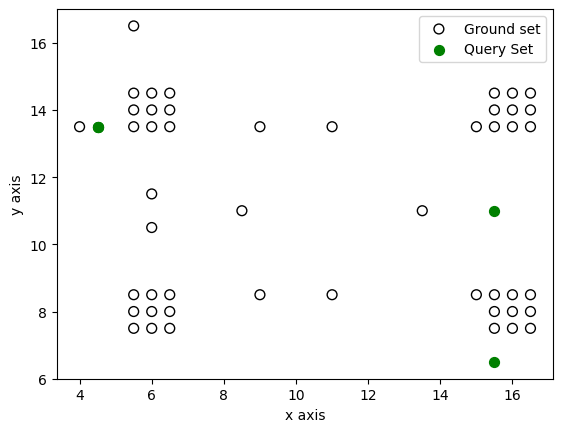

In [ ]:
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='green', label="Queries")
plt.scatter(singlequeryxs, singlequeryys, s=50, color='green', label="Queries")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend(["Ground set","Query Set"])
plt.show()

In [ ]:
def printGreedyRounded(greedyList):
  print([(elem[0], round(elem[1],3)) for elem in greedyList])

[(0, 0.164), (13, 0.057), (7, 0.023), (1, 0.008), (14, 0.004), (47, 0.003), (8, 0.001), (2, 0.001), (46, 0.0), (45, 0.0)]


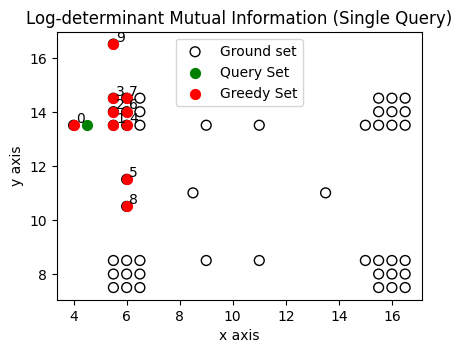

In [ ]:
from submodlib import LogDeterminantMutualInformationFunction
etas = [1]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(4,3,row*3+index)
    obj = LogDeterminantMutualInformationFunction(n=48, num_queries=1, data=groundData, 
                                                    queryData=singleQueryData, metric="euclidean", 
                                                    magnificationEta=eta, lambdaVal=1)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Ground")
    # plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
    # plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='green', label="Queries")
    plt.scatter(singlequeryxs, singlequeryys, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='red', label="Greedy")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.legend(["Ground set","Query Set","Greedy Set"])
    plt.title('Log-determinant Mutual Information (Single Query)')
    index += 1
    if index == 4:
        row += 1
        index = 1

[(31, 2.401), (26, 1.859), (21, 1.632), (37, 1.506), (20, 1.426), (25, 1.37), (32, 1.33), (27, 1.298), (39, 1.274), (41, 1.254)]


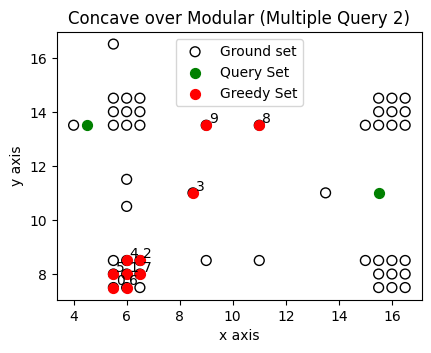

In [ ]:
from submodlib import ConcaveOverModularFunction
etas = [1]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(4,3,row*3+index)
    obj = ConcaveOverModularFunction(n=48, num_queries=2, data=groundData, 
                                                    queryData=multipleQueryData2)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Ground")
    # plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
    plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='green', label="Queries")
    # plt.scatter(singlequeryxs, singlequeryys, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='red', label="Greedy")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.legend(["Ground set","Query Set","Greedy Set"])
    # plt.title('Concave over Modular (Single Query)')
    # plt.title('Concave over Modular (Multiple Query 1)')
    plt.title('Concave over Modular (Multiple Query 2)')
    index += 1
    if index == 4:
        row += 1
        index = 1